### INTRODUCTION

Diabetes is a chronic metabolic condition associated with serious health complications. Understanding the factors that influence diabetes risk is important for designing preventive interventions.
This report examines the relationship between diabetes status and several demographic and behavioural variables in the dataset.

### PROJECT GOALS

To explore the factors associated with diabetes status (Diabetes_012) and identify 
key health, lifestyle, demographic, and socioeconomic predictors that may influence
the risk of developing diabetes. This analysis aims to understand patterns in health
behaviors, chronic conditions, and demographic characteristics that may contribute 
to diabetes, and to generate insights that can guide prevention and intervention 
strategies.

- Describe diabetes prevalence across multiple demographic groups

- Analyze lifestyle and health factors associated with diabetes

- Investigate chronic conditions linked to diabetes

- Examine barriers to healthcare access as it related to diabetes status

This project will be able to answer some following questions:

##### DEMOGRAPHICS

- What is the prevalence of diabetes (Diabetes_012) in the dataset?

- How does diabetes status vary across demographic factors such as age, sex, 
education, and income?

- Which age groups show the highest proportion of diabetes?

##### LIFESTYLE

- Does BMI (Body Mass Index) differ significantly between diabetic and non-diabetic individuals?

- Is physical activity (PhysActivity) associated with lower diabetes prevalence?

- Does smoking (Smoker) status influence diabetes risk?

- Do heavy alcohol consumers (HvyAlcoholConsump) have different diabetes rates compared to non-heavy drinkers?

- Does fruit or vegetable consumption (Fruits, Veggies) relate to diabetes status?

##### CHRONIC DISEASE

- Is there an association between high blood pressure (HighBP) and diabetes?

- How does high cholesterol (HighChol) relate to diabetes status?

- Is there evidence that individuals with stroke or heart disease/heart attack have
higher rates of diabetes?

##### PHYSICAL HEALTH AND HEALTH CARE ACCESS

- Are mental health days (MentHlth), physical health days (PhysHlth) and difficulty 
walking (DiffWalk) more common among people with diabetes?

- Do individuals who have healthcare coverage (AnyHealthcare) and the inability to see
a doctor due to cost (NoDocbcCost) associated with higher diabetes prevalence?

### DATA

##### Data Source: Kaggle

diabetes _ 012 _ health _ indicators _ BRFSS2015.csv is a clean dataset of 253,680 
survey responses to the CDC BRFSS2015. 
The target variable Diabetes_012 has 3 classes. 0 is for no diabetes or only during pregnancy, 1 is for prediabetes, and 2 is for diabetes. 
There is class imbalance in this dataset. This dataset has 22 variables.

- ##### Diabetes_012:
0 = no diabetes 1 = prediabetes 2 = diabetes

- ##### HighBP
0 = no high BP 1 = high BP

- ##### HighChol
0 = no high cholesterol 1 = high cholesterol

- ##### CholCheck
0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years

- ##### BMI
Body Mass Index

- ##### Smoker
Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes

- ##### Stroke
(Ever told) you had a stroke. 0 = no 1 = yes

- ##### HeartDiseaseorAttack
coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes

- ##### PhysActivity
physical activity in past 30 days - not including job 0 = no 1 = yes

- ##### Fruits
Consume Fruit 1 or more times per day 0 = no 1 = yes

- ##### Veggies
Consume Vegetables 1 or more times per day 0 = no 1 = yes

- ##### HvyAlcoholConsump
Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) 0 = no 1 = yes

- ##### AnyHealthcare
Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes

- ##### NoDocbcCost
Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes

- ##### GenHlth
Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor

- ##### MentHlth
Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30

- ##### PhysHlth
Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30

- ##### DiffWalk
Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes

- ##### Sex
0 = female 1 = male

- ##### Age
13-level age category (_AGEG5YR see codebook) 1 = 18-24 / 2 = 25-29 / 3 = 30-34 / 4 = 35-39 / 5 = 40-44 / 6 = 45-49 / 7 = 50-54 / 8 = 55-59 / 9 = 60-64 / 10 = 65-69 / 11 = 70-74 / 12 = 75-79 / 13 = 80 or older

- ##### Education
Education level (EDUCA see codebook) scale 1-6 1 = Never attended school or only kindergarten, 2 = Grades 1 through 8 (Elementary), 3 = Grades 9 through 11 (Some high school), 4 = Grade 12 or GED (High school graduate), 5 = College 1 year to 3 years (Some college or technical school), 6 = College 4 years or more (College graduate)

- ##### Income
Income scale (INCOME2 see codebook) scale 1-8 1 = Below 10,000, 2= 10,000-14,999, 3=15,000-19,999, 4=20,000-24,999, 5=25,000-34,999), 6=35,000-49,999, 7=50,000 - 74,999, 8=75,000 or more 



### DATA PREPARATION

##### IMPORT PYTHON MODULES

In [1]:
#importing the needed python modules
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

In [41]:
#loading the dataset
diabetes_df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')
diabetes_df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


##### DATA CLEANING

In [20]:
#checking for missing values
diabetes_df.isna().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [21]:
#checking for number of rows and columns
diabetes_df.shape

(253680, 22)

In [22]:
#checking for data types of all the variables in the dataset
diabetes_df.dtypes

Diabetes_012            int64
HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
dtype: object

In [43]:

#converting the datatypes of variables from float to int
cols_to_convert = ['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income']
diabetes_df = diabetes_df[cols_to_convert].astype('int64')
diabetes_df.head()


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [45]:
#renaming the diabetes_df column to DiabetesStatus
diabetes_df = diabetes_df.rename({'Diabetes_012':'DiabetesStatus'}, axis=1)
diabetes_df.columns

Index(['DiabetesStatus', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

### EXPLORATORY DATA ANALYSIS

In [46]:
#checking for summary statistics
diabetes_df.describe()

,DiabetesStatus,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [47]:
#checking for the information of the dataset
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   DiabetesStatus        253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

### DATA VISUALIZATION

What is the prevalence of diabetes (Diabetes_012) in the dataset?

In [48]:

#counting the numbers of each observations in Diabetes_df variable
diabetes_df['DiabetesStatus'].value_counts(ascending = True)

DiabetesStatus
1      4631
2     35346
0    213703
Name: count, dtype: int64

In [49]:
#creating a diabetes prevalence table
counts = diabetes_df['DiabetesStatus'].value_counts()
percentage = diabetes_df['DiabetesStatus'].value_counts(normalize=True)*100

prevalence_table = pd.DataFrame({'Count': counts, 'Percentage(%)': percentage})
prevalence_table = prevalence_table.reset_index()
print(prevalence_table)

   DiabetesStatus   Count  Percentage(%)
0               0  213703      84.241170
1               2   35346      13.933302
2               1    4631       1.825528


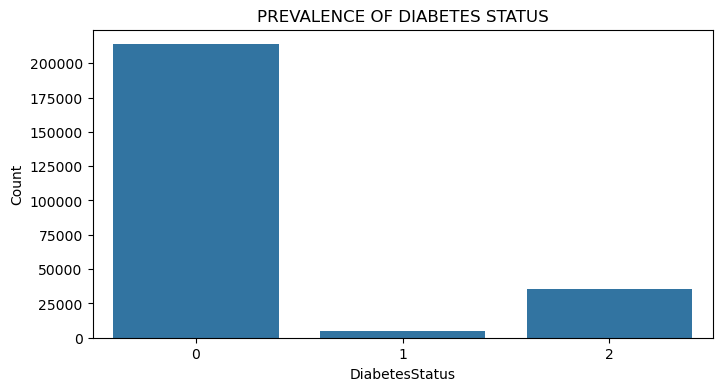

In [101]:

#plotting a bar chart of the prevalence of diabetes status
plt.figure(figsize=[8,4])
sns.countplot(x='DiabetesStatus', data = diabetes_df)
plt.xlabel('DiabetesStatus')
plt.ylabel('Count')
plt.title('PREVALENCE OF DIABETES STATUS')
plt.show()


From our diabetes prevalence table, 13.9%(35346) of the entire population of our dataset has
has diabetes. 84.2% (213703) does not have diabetes while 1.8% (4631) are in the prediabetes stage.


How does diabetes status vary across demographic factors such as age, sex, education, and income?

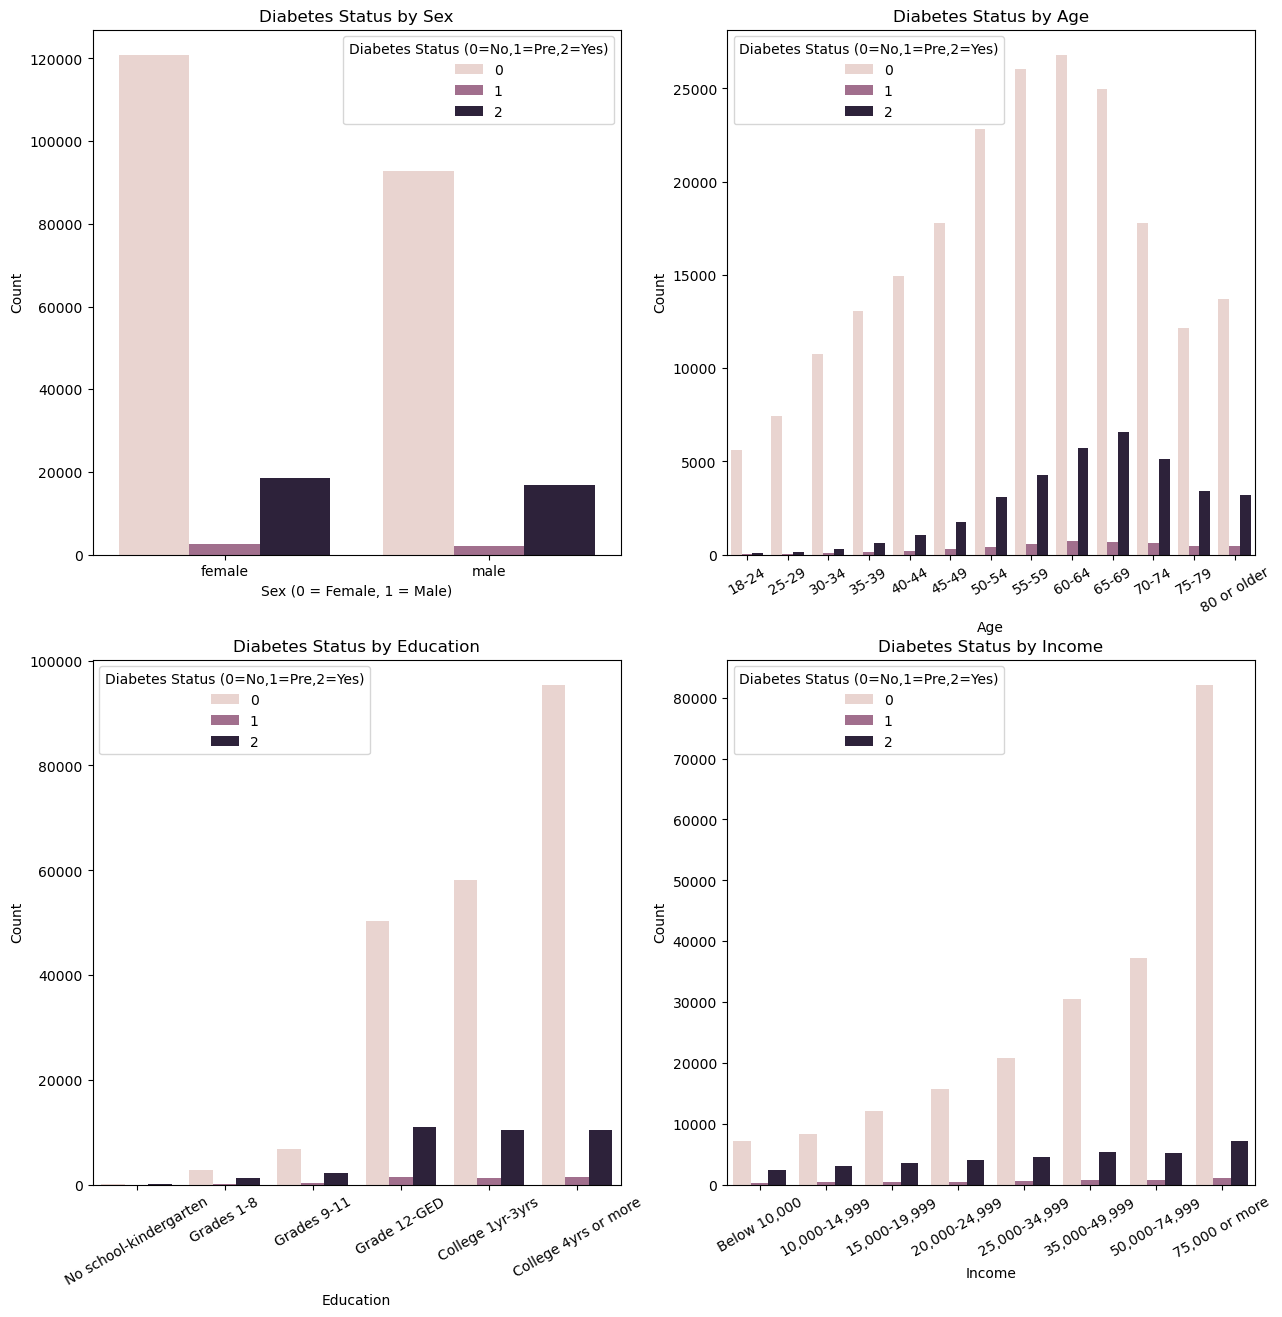

In [51]:
# Diabetes Status by Sex, Age, Education, Income
plt.figure(figsize=(15, 15))
ax1=plt.subplot(2,2,1)
sns.countplot(data=diabetes_df, x='Sex', hue='DiabetesStatus')
plt.title("Diabetes Status by Sex")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Count")
sex = ['female', 'male']
x_values= range(len(sex))
plt.legend(title="Diabetes Status (0=No,1=Pre,2=Yes)")
ax1.set_xticks(x_values)
ax1.set_xticklabels(sex)

ax2=plt.subplot(2,2,2)
sns.countplot(data=diabetes_df, x='Age', hue='DiabetesStatus')
plt.title("Diabetes Status by Age")
plt.xlabel("Age")
plt.ylabel("Count")
age=['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older']
x_values= range(len(age))
plt.legend(title="Diabetes Status (0=No,1=Pre,2=Yes)")
ax2.set_xticks(x_values)
ax2.set_xticklabels(age, rotation=30)

ax3=plt.subplot(2,2,3)
sns.countplot(data=diabetes_df, x='Education', hue='DiabetesStatus')
plt.title("Diabetes Status by Education")
plt.xlabel("Education")
plt.ylabel("Count")
education=['No school-kindergarten', 'Grades 1-8', 'Grades 9-11', 'Grade 12-GED', 'College 1yr-3yrs', 'College 4yrs or more']
x_values= range(len(education))
plt.legend(title="Diabetes Status (0=No,1=Pre,2=Yes)")
ax3.set_xticks(x_values)
ax3.set_xticklabels(education, rotation=30)

ax4=plt.subplot(2,2,4)
sns.countplot(data=diabetes_df, x='Income', hue='DiabetesStatus')
plt.title("Diabetes Status by Income")
plt.xlabel("Income")
plt.ylabel("Count")
income=['Below 10,000', '10,000-14,999', '15,000-19,999', '20,000-24,999', '25,000-34,999', '35,000-49,999', '50,000-74,999','75,000 or more']
x_values= range(len(income))
plt.legend(title="Diabetes Status (0=No,1=Pre,2=Yes)")
ax4.set_xticks(x_values)
ax4.set_xticklabels(income, rotation=30)

plt.show()


From our bar charts, we can conclude that:

-For income and Education, diabetes status increases as income and education status increases.

-For sex, diabetes are more common in females than in males, as females have the highest proportion of the population.

-For age, diabetes values increases with age as the younger groups (18–24 and 25–29) had substantially lower prevalence.



Which age groups show the highest proportion of diabetes?


In [103]:
#Creating a column called AgeGroup to represent each age range corresponding to the age values in the age column
labels=['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', 
        '60-64', '65-69', '70-74', '75-79', '80 or older']
data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

# Create a dictionary for mapping
age_mapping={1:'18-24', 2:'25-29', 3:'30-34', 4:'35-39', 5:'40-44', 6:'45-49', 7:'50-54', 8:'55-59', 
        9:'60-64', 10:'65-69', 11:'70-74', 12:'75-79', 13:'80 or older'}

# Apply the mapping to create the AgeGroup column
# Assuming diabetes_df has a column that contains values 1-13 that need to be mapped
diabetes_df['AgeGroup']= diabetes_df['Age'].map(age_mapping)

age_group_counts = diabetes_df['AgeGroup'].value_counts()
print(age_group_counts)


AgeGroup
60-64          33244
65-69          32194
55-59          30832
50-54          26314
70-74          23533
45-49          19819
80 or older    17363
40-44          16157
75-79          15980
35-39          13823
30-34          11123
25-29           7598
18-24           5700
Name: count, dtype: int64


In [96]:
# Diabetes prevalence by age group
diabetes_prevalence_by_age = (diabetes_df[diabetes_df['DiabetesStatus'] == 2].groupby('AgeGroup')
    .size()/diabetes_df.groupby('AgeGroup').size()) * 100

print(diabetes_prevalence_by_age)

AgeGroup
18-24           1.368421
25-29           1.842590
30-34           2.822979
35-39           4.528684
40-44           6.504920
45-49           8.789545
50-54          11.735198
55-59          13.826544
60-64          17.245217
65-69          20.370255
70-74          21.845918
75-79          21.295369
80 or older    18.481829
dtype: float64


In [97]:
highest_group = diabetes_prevalence_by_age.idxmax()
highest_value = diabetes_prevalence_by_age.max()

print("Age group with highest diabetes prevalence:", highest_group, f"({highest_value:.2f}%)")

Age group with highest diabetes prevalence: 70-74 (21.85%)


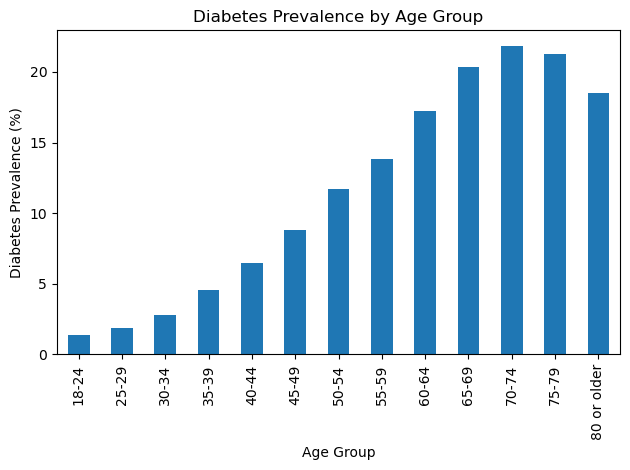

In [98]:
diabetes_prevalence_by_age.plot(kind='bar')
plt.ylabel("Diabetes Prevalence (%)")
plt.xlabel("Age Group")
plt.title("Diabetes Prevalence by Age Group")
plt.tight_layout()
plt.show()

Diabetes prevalence increased with age. The highest proportion of diabetes was 
observed among individuals aged 70–74 years, followed by those aged 75–79 years. 
Younger groups (18–24 and 25–29) had substantially lower prevalence.


Does BMI (Body Mass Index) differ significantly between diabetic and non-diabetic individuals?

In [55]:
#the unique values of BMI
diabetes_df['BMI'].unique()

array([40, 25, 28, 27, 24, 30, 34, 26, 33, 21, 23, 22, 38, 32, 37, 31, 29,
       20, 35, 45, 39, 19, 47, 18, 36, 43, 55, 49, 42, 17, 16, 41, 44, 50,
       59, 48, 52, 46, 54, 57, 53, 14, 15, 51, 58, 63, 61, 56, 74, 62, 64,
       66, 73, 85, 60, 67, 65, 70, 82, 79, 92, 68, 72, 88, 96, 13, 81, 71,
       75, 12, 77, 69, 76, 87, 89, 84, 95, 98, 91, 86, 83, 80, 90, 78],
      dtype=int64)

In [54]:

#Comparing the BMI of only diabetic and non_diabetic to check for significant difference
#Taking DiabetesStatus as binary, 0 = no diabetes or prediabetes while 1 = diabetes
diabetes_df["DiabetesBinary"] = diabetes_df["DiabetesStatus"].apply(lambda x: 1 if x == 2 else 0)

no_diabetes = diabetes_df[diabetes_df["DiabetesBinary"] == 0]["BMI"]   # no diabetes OR pre-diabetes
diabetes = diabetes_df[diabetes_df["DiabetesBinary"] == 1]["BMI"]   # diabetes

t_stat, p_value = ttest_ind(no_diabetes, diabetes, equal_var=False)

print("T-test comparing BMI between diabetic(1) and non_diabetic(0)")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.6f}")


T-test comparing BMI between diabetic(1) and non_diabetic(0)
T-statistic: -99.9196, P-value: 0.000000


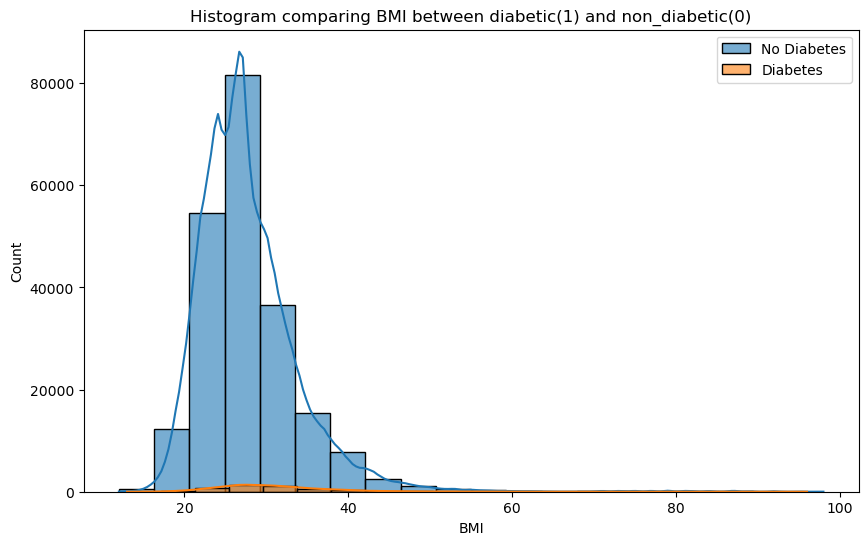

In [38]:
#plotting the histogram
plt.figure(figsize=[10,6])
sns.histplot(diabetes_df[diabetes_df.DiabetesStatus ==0]['BMI'], bins=20, kde=True, label='No Diabetes', alpha=0.6)
sns.histplot(diabetes_df[diabetes_df.DiabetesStatus ==1]['BMI'], bins=20, kde=True, label='Diabetes', alpha=0.6)
plt.title('Histogram comparing BMI between diabetic(1) and non_diabetic(0)')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.legend()
plt.show()

From the above histogram and the values of the t-test performed with a tsat value of -99.9196, P-value: 0.000000, we can see that there is a significant difference between the BMI of diabetic and non-diabetic individuals.


Is physical activity (PhysActivity) associated with lower diabetes prevalence?

In [30]:
diabetes_df['PhysActivity'].unique()

array([0, 1], dtype=int64)

In [31]:
diabetes_df['DiabetesStatus'].unique()

array([0, 2, 1], dtype=int64)

In [39]:

#Both PhysActivity and DiabetesStatus are ordinal categotical variables,so we perform a chi2 test to check for their association
#Taking DiabetesStatus as binary, 0 = no diabetes or prediabetes while 1 = diabetes
diabetes_df["DiabetesStatusBinary"] = diabetes_df["DiabetesStatus"].apply(lambda x: 1 if x == 2 else 0)
# Creating a contingency table first
contingency_table = pd.crosstab(diabetes_df.DiabetesStatusBinary, diabetes_df.PhysActivity)

# print the table to inspect it
print("Contingency table:")
print(contingency_table)
chi2, pval, _, expected_f = chi2_contingency(contingency_table)
alfa = 0.05
result = ('significant' if pval < alfa else 'not significant')

print(f'chi2: {chi2:.2f}')
print(f'p-value: {pval:.6f}')
print(f'Test result: association between Physical activity and Diabetes Prevalence is {result} (alfa = {alfa})')

Contingency table:
PhysActivity              0       1
DiabetesStatusBinary               
0                     48701  169633
1                     13059   22287
chi2: 3539.42
p-value: 0.000000
Test result: association between Physical activity and Diabetes Prevalence is significant (alfa = 0.05)


In [43]:
# Calculate prevalence (percentage with diabetes)
prevalence = diabetes_df.groupby("PhysActivity")["DiabetesBinary"].mean().reset_index()
prevalence["DiabetesPrevalence(%)"] = prevalence["DiabetesBinary"] * 100
print(prevalence["DiabetesPrevalence(%)"].unique())

[21.14475389 11.6126511 ]


In [44]:
print(prevalence.head())

   PhysActivity  DiabetesBinary  DiabetesPrevalence(%)
0             0        0.211448              21.144754
1             1        0.116127              11.612651


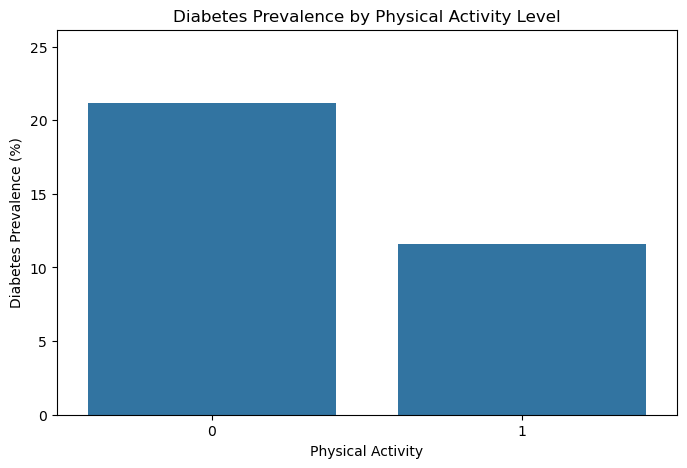

In [45]:
plt.figure(figsize=(8, 5))
sns.barplot(data=prevalence, x="PhysActivity", y="DiabetesPrevalence(%)")
plt.title("Diabetes Prevalence by Physical Activity Level")
plt.ylabel("Diabetes Prevalence (%)")
plt.xlabel("Physical Activity")
plt.ylim(0, prevalence["DiabetesPrevalence(%)"].max() + 5)
plt.show()

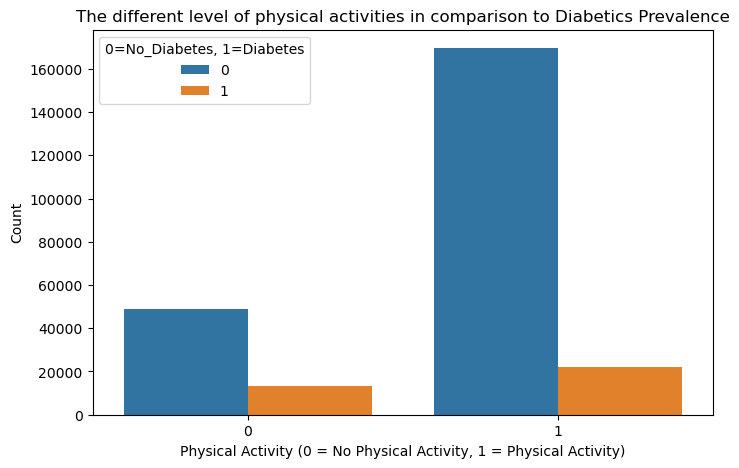

In [117]:
plt.figure(figsize=[8,5])
sns.countplot(data=diabetes_df, x='PhysActivity', hue='DiabetesStatusBinary')
plt.xlabel('Physical Activity (0 = No Physical Activity, 1 = Physical Activity)')
plt.ylabel('Count')
plt.title('The different level of physical activities in comparison to Diabetics Prevalence')
plt.legend(title="0=No_Diabetes, 1=Diabetes")
plt.show()


From the chi-square test with values (chi2: 3539.42 p-value: 0.000000), association between Physical activity and Diabetes Prevalence is significant, also from the dataset and the bar chart, we can see that People who do physical activity have lower diabetes prevalence
and People who do not do physical activity have higher diabetes prevalence.

Does smoking (Smoker) status influence diabetes risk?

In [104]:
#Checking for the unique values of Smoker
diabetes_df['Smoker'].unique()

array([1, 0], dtype=int64)

In [51]:

#We will convert our Diabetes Status to Binary because the Prediabetes individuals are not yet declared diabetic, so 0=no_diabetes and 1=prediabetes will be declared as 0=no_diabestes while 1 will be diabetes
diabetes_df['DiabetesBinaryStatus'] = diabetes_df['DiabetesStatus'].apply(lambda x: 1 if x == 2 else 0)
#since we are looking at diabetes risk we will find the prevalence of diabetes with respect to smokers
prevalence = diabetes_df.groupby("Smoker")["DiabetesBinaryStatus"].mean().reset_index()
prevalence["DiabetesPrevalence(%)"] = prevalence["DiabetesBinaryStatus"] * 100
print(prevalence["DiabetesPrevalence(%)"].unique())

[12.05533177 16.29292938]


In [54]:

#since both diabetesBinaryStatus and smoker are both ordinal categorical variable, we weill perform a chi-square test
#first get the chi contingency table
contingency_table = pd.crosstab(diabetes_df.DiabetesBinaryStatus, diabetes_df.Smoker)

# print the table to inspect it
print("Contingency table:")
print(contingency_table)
chi2, pval, _, expected_f = chi2_contingency(contingency_table)
alfa = 0.05
result = ('significant' if pval < alfa else 'not significant')

print(f'chi2: {chi2:.2f}')
print(f'p-value: {pval:.6f}')
print(f'Test result: association between Smoker and Diabetes is {result} (alfa = {alfa})')

Contingency table:
Smoker                     0      1
DiabetesBinaryStatus               
0                     124228  94106
1                      17029  18317
chi2: 937.06
p-value: 0.000000
Test result: association between Smoker and Diabetes is significant (alfa = 0.05)


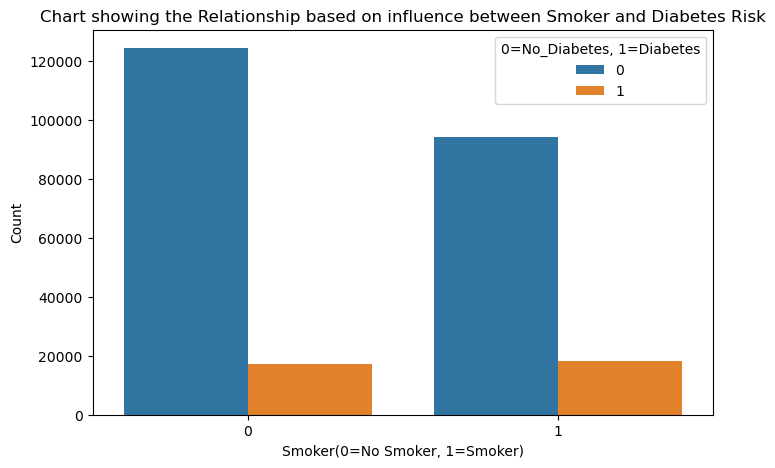

In [118]:
plt.figure(figsize=[8,5])
sns.countplot(data=diabetes_df, x='Smoker', hue='DiabetesBinaryStatus')
plt.xlabel('Smoker(0=No Smoker, 1=Smoker)')
plt.ylabel('Count')
plt.legend(title="0=No_Diabetes, 1=Diabetes")
plt.title('Chart showing the Relationship based on influence between Smoker and Diabetes Risk')
plt.show()


Diabetes prevalence was higher among smokers (16.29%) than non-smokers (12.06%), Prevalence shows:
The difference is 4.24 percentage points (16.29 − 12.06 = 4.23).
A chi-square test confirmed that this difference was statistically significant (χ² = 937.06, p < 0.001). This indicates that the prevalence of diabetes differs substantially between smokers and non-smokers. Therefore, smoking status has a strong influence on diabetes risk in this dataset.


Do heavy alcohol consumers (HvyAlcoholConsump) have different diabetes rates compared to non-heavy drinkers?

In [59]:
diabetes_df['HvyAlcoholConsump'].unique()

array([0, 1], dtype=int64)

In [64]:
diabetes_df['HvyAlcoholConsump'].value_counts()

HvyAlcoholConsump
0    239424
1     14256
Name: count, dtype: int64

In [60]:
#We will convert our Diabetes Status to Binary because the Prediabetes individuals are not yet declared diabetic, so 0=no_diabetes and 1=prediabetes will be declared as 0=no_diabestes while 1 will be diabetes
diabetes_df['DiabetesBinaryStatus'] = diabetes_df['DiabetesStatus'].apply(lambda x: 1 if x == 2 else 0)
#since we are looking at diabetes risk we will find the prevalence of diabetes with respect to HeavyAlcoholConsumption
prevalence = diabetes_df.groupby("HvyAlcoholConsump")["DiabetesBinaryStatus"].mean().reset_index()
prevalence["DiabetesPrevalence(%)"] = prevalence["DiabetesBinaryStatus"] * 100
print(prevalence["DiabetesPrevalence(%)"].unique())

[14.41543037  5.83613917]


In [82]:
#since both diabetesBinaryStatus and heavyalcoholconsumption are both ordinal categorical variable, we weill perform a chi-square test
#first get the chi contingency table
contingency_table = pd.crosstab(diabetes_df.DiabetesBinaryStatus, diabetes_df.HvyAlcoholConsump)

# print the table to inspect it
print("Contingency table:")
print(contingency_table)
chi2, pval, _, expected_f = chi2_contingency(contingency_table)
alfa = 0.05
result = ('significant' if pval < alfa else 'not significant')

print(f'chi2: {chi2:.2f}')
print(f'p-value: {pval:.6f}')
print(f'Test result: association between HeavyAlcoholConsumption and Diabetes is {result} (alfa = {alfa})')

Contingency table:
HvyAlcoholConsump          0      1
DiabetesBinaryStatus               
0                     204910  13424
1                      34514    832
chi2: 825.12
p-value: 0.000000
Test result: association between HeavyAlcoholConsumption and Diabetes is significant (alfa = 0.05)


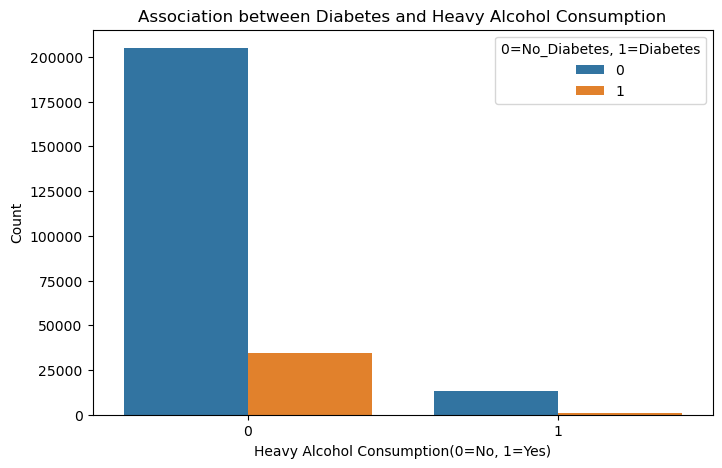

In [105]:
plt.figure(figsize=[8,5])
sns.countplot(data=diabetes_df, x='HvyAlcoholConsump', hue='DiabetesBinaryStatus')
plt.xlabel('Heavy Alcohol Consumption(0=No, 1=Yes)')
plt.ylabel('Count')
plt.legend(title="0=No_Diabetes, 1=Diabetes")
plt.title('Association between Diabetes and Heavy Alcohol Consumption')
plt.show()

Diabetes prevalence was lower among heavy alcohol consumers (5.84%) compared to non-heavy alcohol consumers (14.42%), this is due to the proportion of heavy alcohol consumption population in our dataset.
A chi-square test showed this difference to be statistically significant (χ² = 825.12, p < 0.001),indicating a strong association
and statistical difference between heavy alcohol consumption and diabetes rates.


Does fruit or vegetable consumption (Fruits, Veggies) relate to diabetes status?

In [71]:
diabetes_df['Fruits'].value_counts()

Fruits
1    160898
0     92782
Name: count, dtype: int64

In [72]:
diabetes_df['Veggies'].value_counts()

Veggies
1    205841
0     47839
Name: count, dtype: int64

In [109]:
#We will convert our Diabetes Status to Binary because the Prediabetes individuals are not yet declared diabetic, so 0=no_diabetes and 1=prediabetes will be declared as 0=no_diabestes while 1 will be diabetes
diabetes_df['DiabetesBinaryStatus'] = diabetes_df['DiabetesStatus'].apply(lambda x: 1 if x == 2 else 0)
#since we are looking at diabetes risk we will find the prevalence of diabetes with respect to Fruits
prevalence = diabetes_df.groupby(["Fruits"])["DiabetesBinaryStatus"].mean().reset_index()
prevalence["DiabetesPrevalence(%)"] = prevalence["DiabetesBinaryStatus"] * 100
prevalence

,Fruits,DiabetesBinaryStatus,DiabetesPrevalence(%)
0,0,0.157929,15.792934
1,1,0.128609,12.860943


In [108]:
#We will convert our Diabetes Status to Binary because the Prediabetes individuals are not yet declared diabetic, so 0=no_diabetes and 1=prediabetes will be declared as 0=no_diabestes while 1 will be diabetes
diabetes_df['DiabetesBinaryStatus'] = diabetes_df['DiabetesStatus'].apply(lambda x: 1 if x == 2 else 0)
#since we are looking at diabetes risk we will find the prevalence of diabetes with respect to Veggies
prevalence = diabetes_df.groupby(["Veggies"])["DiabetesBinaryStatus"].mean().reset_index()
prevalence["DiabetesPrevalence(%)"] = prevalence["DiabetesBinaryStatus"] * 100
prevalence

,Veggies,DiabetesBinaryStatus,DiabetesPrevalence(%)
0,0,0.179979,17.997868
1,1,0.129887,12.988666


In [86]:
#since both diabetesBinaryStatus and Fruits are both ordinal categorical variable, we weill perform a chi-square test
#first get the chi contingency table
contingency_table = pd.crosstab(diabetes_df.DiabetesBinaryStatus, diabetes_df.Fruits)

# print the table to inspect it
print("Contingency table:")
print(contingency_table)
chi2, pval, _, expected_f = chi2_contingency(contingency_table)
alfa = 0.05
result = ('significant' if pval < alfa else 'not significant')

print(f'chi2: {chi2:.2f}')
print(f'p-value: {pval:.6f}')
print(f'Test result: relates between Fruits and Diabetes is {result} (alfa = {alfa})')

Contingency table:
Fruits                    0       1
DiabetesBinaryStatus               
0                     78129  140205
1                     14653   20693
chi2: 421.61
p-value: 0.000000
Test result: association between Fruits and Diabetes is significant (alfa = 0.05)


In [87]:
#since both diabetesBinaryStatus and Veggies are both ordinal categorical variable, we will perform a chi-square test
#first get the chi contingency table
contingency_table = pd.crosstab(diabetes_df.DiabetesBinaryStatus, diabetes_df.Veggies)

# print the table to inspect it
print("Contingency table:")
print(contingency_table)
chi2, pval, _, expected_f = chi2_contingency(contingency_table)
alfa = 0.05
result = ('significant' if pval < alfa else 'not significant')

print(f'chi2: {chi2:.2f}')
print(f'p-value: {pval:.6f}')
print(f'Test result: relationship between Veggies and Diabetes is {result} (alfa = {alfa})')

Contingency table:
Veggies                   0       1
DiabetesBinaryStatus               
0                     39229  179105
1                      8610   26736
chi2: 811.81
p-value: 0.000000
Test result: relationship between Veggies and Diabetes is significant (alfa = 0.05)


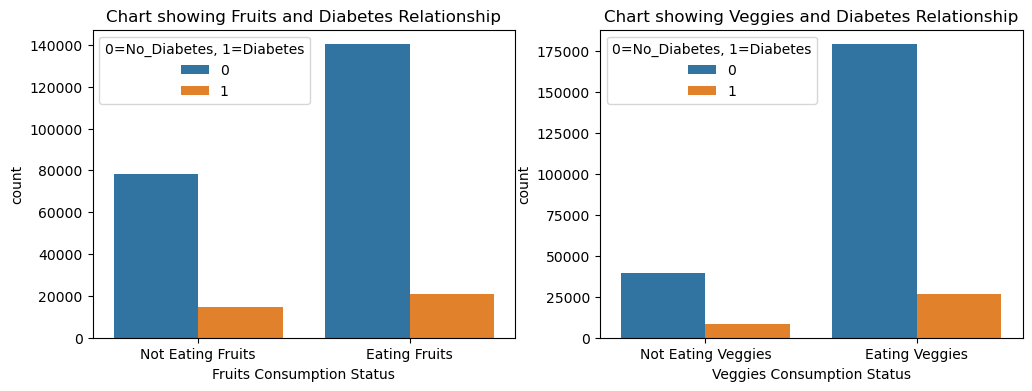

In [108]:
#plots to show Fruits/veggies and Diabetes Relationship')
plt.figure(figsize=[12,4])

ax1=plt.subplot(1,2,1)
sns.countplot(data=diabetes_df, x='Fruits', hue='DiabetesBinaryStatus')
plt.xlabel('Fruits Consumption Status')
plt.ylabel('count')
fruits = ['Not Eating Fruits', 'Eating Fruits']
x_label = range(len(fruits))
ax1.set_xticks(x_label)
ax1.set_xticklabels(fruits)
plt.legend(title="0=No_Diabetes, 1=Diabetes")
plt.title('Chart showing Fruits and Diabetes Relationship')

ax2=plt.subplot(1,2,2)
sns.countplot(data=diabetes_df, x='Veggies', hue='DiabetesBinaryStatus')
plt.xlabel('Veggies Consumption Status')
plt.ylabel('count')
veggies = ['Not Eating Veggies', 'Eating Veggies']
x_label = range(len(veggies))
ax2.set_xticks(x_label)
ax2.set_xticklabels(veggies)
plt.legend(title="0=No_Diabetes, 1=Diabetes")
plt.title('Chart showing Veggies and Diabetes Relationship')

plt.show()

Fruits
Chi2 = 421.61, p < 0.000001
Very strong evidence that fruit consumption is associated with diabetes status (relationship ≠ random).

Vegetables
Chi2 = 811.81, p < 0.000001
Even stronger evidence that vegetable consumption is associated with diabetes status.

Statistically, both relationships are highly significant.

Fruits Population:
Eating fruits = 160,898
Not eating fruits = 92,782

Vegetables Population:
Eating vegetables = 205,841
Not eating vegetables = 47,839

Large sample sizes mean: Chi-square tests have very high statistical power
This supports that the relationships are not only statistically significant but also practically relevant.

Fruits and diabetes
People who do not eat fruits show ~23% higher diabetes prevalence
(15.79 vs 12.86)

Vegetables and diabetes
People who do not eat vegetables show ~38% higher diabetes prevalence
(17.99 vs 12.99)

The vegetable-consumption relationship is stronger, based on:
-Higher prevalence gap
-Higher chi-square statistic
-Smaller veggie-eating group (47k) compared to fruit-eating group (92k), yet stronger effect

Fruit and vegetable consumption both show significant associations with diabetes status. Individuals who do not eat fruits have 
higher diabetes prevalence (15.79%) compared to those who do (12.86%). The effect is even stronger for vegetables: non-consumers
have a diabetes prevalence of 17.99% compared to 12.99% among consumers. Chi-square tests confirm these associations are 
statistically significant (p < 0.000001). Given the large sample sizes, these findings provide strong evidence that lower fruit 
and vegetable intake is linked to higher diabetes prevalence in this population.


Is there an association between high blood pressure (HighBP) and diabetes?

In [121]:
diabetes_df['HighBP'].value_counts()

HighBP
0    144851
1    108829
Name: count, dtype: int64

In [125]:
#We will convert our Diabetes Status to Binary because the Prediabetes individuals are not yet declared diabetic, so 0=no_diabetes and 1=prediabetes will be declared as 0=no_diabestes while 1 will be diabetes
diabetes_df['DiabetesBinaryStatus'] = diabetes_df['DiabetesStatus'].apply(lambda x: 1 if x == 2 else 0)
#since we are looking at diabetes risk we will find the prevalence of diabetes with respect to Fruits
prevalence = diabetes_df.groupby(["HighBP"])["DiabetesBinaryStatus"].mean().reset_index()
prevalence["DiabetesPrevalence(%)"] = prevalence["DiabetesBinaryStatus"] * 100
prevalence

,HighBP,DiabetesBinaryStatus,DiabetesPrevalence(%)
0,0,0.060352,6.035167
1,1,0.244457,24.445690


In [139]:
#since both diabetesBinaryStatus and HighBP are both ordinal categorical variable, we will perform a chi-square test
#first get the chi contingency table
contingency_table = pd.crosstab(diabetes_df.DiabetesBinaryStatus, diabetes_df.HighBP)

# print the table to inspect it
print("Contingency table:")
print(contingency_table)
chi2, pval, _, expected_f = chi2_contingency(contingency_table)
alfa = 0.05
result = ('significant' if pval < alfa else 'not significant')

print(f'chi2: {chi2:.2f}')
print(f'p-value: {pval:.6f}')
print(f'Test result: relationship between HighBP and Diabetes is {result} (alfa = {alfa})')

Contingency table:
HighBP                     0      1
DiabetesBinaryStatus               
0                     136109  82225
1                       8742  26604
chi2: 17562.45
p-value: 0.000000
Test result: relationship between HighBP and Diabetes is significant (alfa = 0.05)


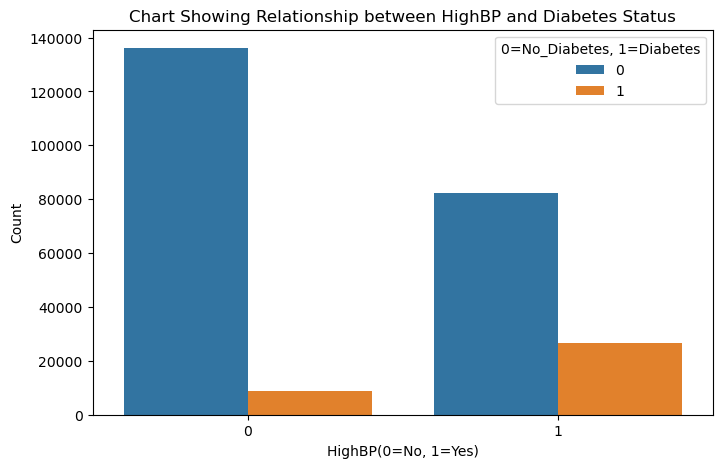

In [110]:
#barplot
plt.figure(figsize=[8,5])
sns.countplot(data=diabetes_df, x='HighBP', hue='DiabetesBinaryStatus')
plt.xlabel('HighBP(0=No, 1=Yes)')
plt.ylabel('Count')
plt.legend(title="0=No_Diabetes, 1=Diabetes")
plt.title('Chart Showing Relationship between HighBP and Diabetes Status')
plt.show()

There is a strong relationship between HighBP and diabetes. A chi-square test showed this relationship to be statistically significant (χ² = 17564.45, p < 0.001),indicating a strong association and statistical difference between HighBP and diabetes status.


How does high cholesterol (HighChol) relate to diabetes status?

In [122]:
diabetes_df['HighChol'].value_counts()

HighChol
0    146089
1    107591
Name: count, dtype: int64

In [126]:
#We will convert our Diabetes Status to Binary because the Prediabetes individuals are not yet declared diabetic, so 0=no_diabetes and 1=prediabetes will be declared as 0=no_diabestes while 1 will be diabetes
diabetes_df['DiabetesBinaryStatus'] = diabetes_df['DiabetesStatus'].apply(lambda x: 1 if x == 2 else 0)
#since we are looking at diabetes risk we will find the prevalence of diabetes with respect to Fruits
prevalence = diabetes_df.groupby(["HighChol"])["DiabetesBinaryStatus"].mean().reset_index()
prevalence["DiabetesPrevalence(%)"] = prevalence["DiabetesBinaryStatus"] * 100
prevalence

,HighChol,DiabetesBinaryStatus,DiabetesPrevalence(%)
0,0,0.079814,7.981436
1,1,0.220149,22.014853


In [138]:
#since both diabetesBinaryStatus and HighChol are both ordinal categorical variable, we will perform a chi-square test
#first get the chi contingency table
contingency_table = pd.crosstab(diabetes_df.DiabetesBinaryStatus, diabetes_df.HighChol)

# print the table to inspect it
print("Contingency table:")
print(contingency_table)
chi2, pval, _, expected_f = chi2_contingency(contingency_table)
alfa = 0.05
result = ('significant' if pval < alfa else 'not significant')

print(f'chi2: {chi2:.2f}')
print(f'p-value: {pval:.6f}')
print(f'Test result: relationship between HighChol and Diabetes is {result} (alfa = {alfa})')

Contingency table:
HighChol                   0      1
DiabetesBinaryStatus               
0                     134429  83905
1                      11660  23686
chi2: 10174.07
p-value: 0.000000
Test result: relationship between HighChol and Diabetes is significant (alfa = 0.05)


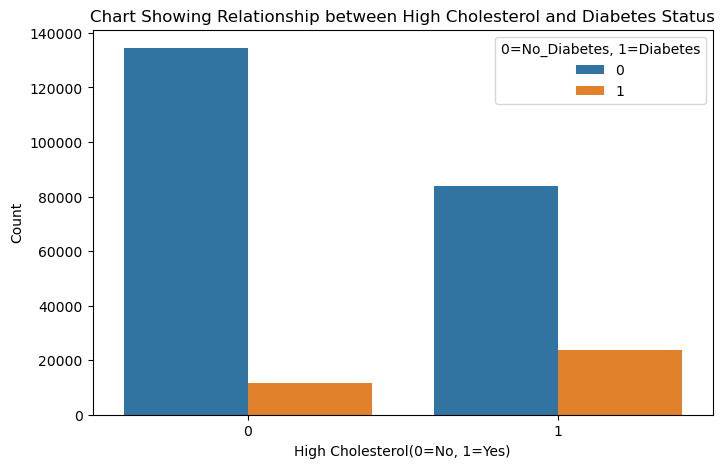

In [111]:
plt.figure(figsize=[8,5])
sns.countplot(data=diabetes_df, x='HighChol', hue='DiabetesBinaryStatus')
plt.xlabel('High Cholesterol(0=No, 1=Yes)')
plt.ylabel('Count')
plt.legend(title="0=No_Diabetes, 1=Diabetes")
plt.title('Chart Showing Relationship between High Cholesterol and Diabetes Status')
plt.show()


Is there evidence that individuals with stroke or heart disease/heart attack have higher rates of diabetes?

In [123]:
diabetes_df['Stroke'].value_counts()

Stroke
0    243388
1     10292
Name: count, dtype: int64

In [127]:
#We will convert our Diabetes Status to Binary because the Prediabetes individuals are not yet declared diabetic, so 0=no_diabetes and 1=prediabetes will be declared as 0=no_diabestes while 1 will be diabetes
diabetes_df['DiabetesBinaryStatus'] = diabetes_df['DiabetesStatus'].apply(lambda x: 1 if x == 2 else 0)
#since we are looking at diabetes risk we will find the prevalence of diabetes with respect to Fruits
prevalence = diabetes_df.groupby(["Stroke"])["DiabetesBinaryStatus"].mean().reset_index()
prevalence["DiabetesPrevalence(%)"] = prevalence["DiabetesBinaryStatus"] * 100
prevalence

,Stroke,DiabetesBinaryStatus,DiabetesPrevalence(%)
0,0,0.131798,13.179779
1,1,0.317528,31.752818


In [142]:
#since both diabetesBinaryStatus and Stroke are both ordinal categorical variable, we will perform a chi-square test
#first get the chi contingency table
contingency_table = pd.crosstab(diabetes_df.DiabetesBinaryStatus, diabetes_df.Stroke)

# print the table to inspect it
print("Contingency table:")
print(contingency_table)
chi2, pval, _, expected_f = chi2_contingency(contingency_table)
alfa = 0.05
result = ('significant' if pval < alfa else 'not significant')

print(f'chi2: {chi2:.2f}')
print(f'p-value: {pval:.6f}')
print(f'Test result: relationship between Stroke and Diabetes is {result} (alfa = {alfa})')

Contingency table:
Stroke                     0     1
DiabetesBinaryStatus              
0                     211310  7024
1                      32078  3268
chi2: 2838.92
p-value: 0.000000
Test result: relationship between Stroke and Diabetes is significant (alfa = 0.05)


In [124]:
diabetes_df['HeartDiseaseorAttack'].value_counts()

HeartDiseaseorAttack
0    229787
1     23893
Name: count, dtype: int64

In [128]:
#We will convert our Diabetes Status to Binary because the Prediabetes individuals are not yet declared diabetic, so 0=no_diabetes and 1=prediabetes will be declared as 0=no_diabestes while 1 will be diabetes
diabetes_df['DiabetesBinaryStatus'] = diabetes_df['DiabetesStatus'].apply(lambda x: 1 if x == 2 else 0)
#since we are looking at diabetes risk we will find the prevalence of diabetes with respect to Fruits
prevalence = diabetes_df.groupby(["HeartDiseaseorAttack"])["DiabetesBinaryStatus"].mean().reset_index()
prevalence["DiabetesPrevalence(%)"] = prevalence["DiabetesBinaryStatus"] * 100
prevalence

,HeartDiseaseorAttack,DiabetesBinaryStatus,DiabetesPrevalence(%)
0,0,0.119537,11.953679
1,1,0.329720,32.972000


In [152]:
#since both diabetesBinaryStatus and HeartDiseaseorAttack are both ordinal categorical variable, we will perform a chi-square test
#first get the chi contingency table
contingency_table = pd.crosstab(diabetes_df.DiabetesBinaryStatus, diabetes_df.HeartDiseaseorAttack)

# print the table to inspect it
print("Contingency table:")
print(contingency_table)
chi2, pval, _, expected_f = chi2_contingency(contingency_table)
alfa = 0.05
result = ('significant' if pval < alfa else 'not significant')

print(f'chi2: {chi2:.2f}')
print(f'p-value: {pval:.6f}')
print(f'Test result: relationship between HeartDiseaseorAttack and Diabetes is {result} (alfa = {alfa})')

Contingency table:
HeartDiseaseorAttack       0      1
DiabetesBinaryStatus               
0                     202319  16015
1                      27468   7878
chi2: 7971.16
p-value: 0.000000
Test result: relationship between HeartDiseaseorAttack and Diabetes is significant (alfa = 0.05)


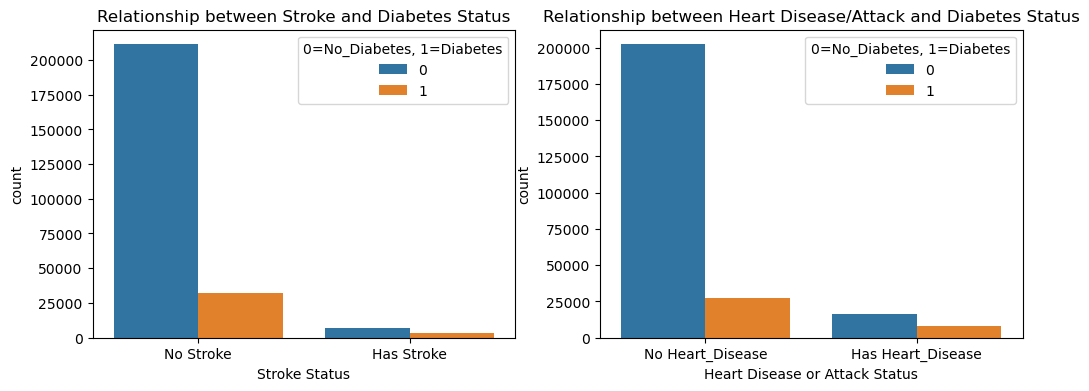

In [113]:
#plotting two subplots for stroke/diabetes and heartDisease/diabetes
plt.figure(figsize=[12,4])

ax1=plt.subplot(1,2,1)
sns.countplot(data=diabetes_df, x='Stroke', hue='DiabetesBinaryStatus')
plt.xlabel('Stroke Status')
plt.ylabel('count')
stroke = ['No Stroke', 'Has Stroke']
x_label = range(len(stroke))
ax1.set_xticks(x_label)
ax1.set_xticklabels(stroke)
plt.legend(title="0=No_Diabetes, 1=Diabetes")
plt.title('Relationship between Stroke and Diabetes Status')

ax2=plt.subplot(1,2,2)
sns.countplot(data=diabetes_df, x='HeartDiseaseorAttack', hue='DiabetesBinaryStatus')
plt.xlabel('Heart Disease or Attack Status')
plt.ylabel('count')
heart_disease_or_Attack = ['No Heart_Disease', 'Has Heart_Disease']
x_label = range(len(heart_disease_or_Attack))
ax2.set_xticks(x_label)
ax2.set_xticklabels(heart_disease_or_Attack)
plt.legend(title="0=No_Diabetes, 1=Diabetes")
plt.title('Relationship between Heart Disease/Attack and Diabetes Status')
plt.show()


Are mental health days (MentHlth), physical health days (PhysHlth) and difficulty walking (DiffWalk) more common among people with diabetes?

In [131]:
diabetes_df['MentHlth'].unique()

array([18,  0, 30,  3,  5, 15, 10,  6, 20,  2, 25,  1,  4,  7,  8, 21, 14,
       26, 29, 16, 28, 11, 12, 24, 17, 13, 27, 19, 22,  9, 23],
      dtype=int64)

In [170]:
# #Comparing the MentHlth of only diabetic and non_diabetic individauls to check for significant difference
#Taking DiabetesStatus as binary, 0 = no diabetes or prediabetes while 1 = diabetes
diabetes_df["DiabetesBinary"] = diabetes_df["DiabetesStatus"].apply(lambda x: 1 if x == 2 else 0)

no_diabetes = diabetes_df[diabetes_df["DiabetesBinary"] == 0]["MentHlth"]   # no diabetes OR pre-diabetes
diabetes = diabetes_df[diabetes_df["DiabetesBinary"] == 1]["MentHlth"]   # diabetes

t_stat, p_value = ttest_ind(no_diabetes, diabetes, equal_var=False)

print("T-test comparing MentHlth between diabetic(1) and non_diabetic(0)")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.6f}")

T-test comparing MentHlth between diabetic(1) and non_diabetic(0)
T-statistic: -29.6948, P-value: 0.000000


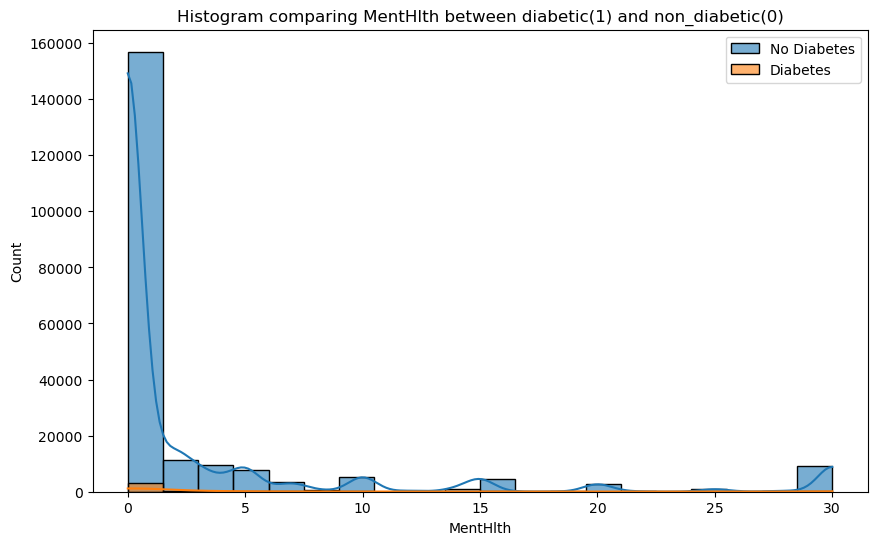

In [168]:
plt.figure(figsize=[10,6])
sns.histplot(diabetes_df[diabetes_df.DiabetesStatus ==0]['MentHlth'], bins=20, kde=True, label='No Diabetes', alpha=0.6)
sns.histplot(diabetes_df[diabetes_df.DiabetesStatus ==1]['MentHlth'], bins=20, kde=True, label='Diabetes', alpha=0.6)
plt.title('Histogram comparing MentHlth between diabetic(1) and non_diabetic(0)')
plt.xlabel('MentHlth')
plt.ylabel('Count')
plt.legend()

plt.show()

In [132]:
diabetes_df['PhysHlth'].unique()

array([15,  0, 30,  2, 14, 28,  7, 20,  3, 10,  1,  5, 17,  4, 19,  6, 12,
       25, 27, 21, 22,  8, 29, 24,  9, 16, 18, 23, 13, 26, 11],
      dtype=int64)

In [171]:
# #Comparing the PhysHlth of only diabetic and non_diabetic individauls to check for significant difference
#Taking DiabetesStatus as binary, 0 = no diabetes or prediabetes while 1 = diabetes
diabetes_df["DiabetesBinary"] = diabetes_df["DiabetesStatus"].apply(lambda x: 1 if x == 2 else 0)

no_diabetes = diabetes_df[diabetes_df["DiabetesBinary"] == 0]["PhysHlth"]   # no diabetes OR pre-diabetes
diabetes = diabetes_df[diabetes_df["DiabetesBinary"] == 1]["PhysHlth"]   # diabetes

t_stat, p_value = ttest_ind(no_diabetes, diabetes, equal_var=False)

print("T-test comparing PhysHlth between diabetic(1) and non_diabetic(0)")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.6f}")

T-test comparing PhysHlth between diabetic(1) and non_diabetic(0)
T-statistic: -68.9688, P-value: 0.000000


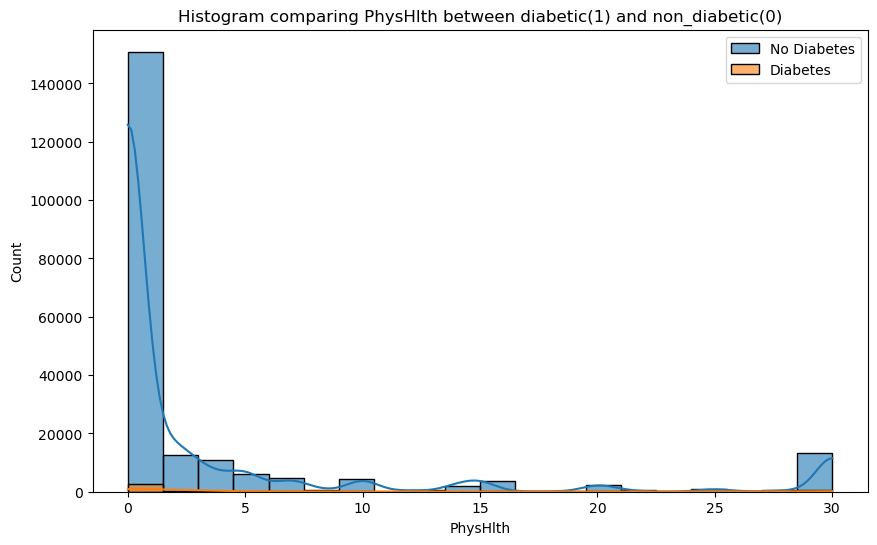

In [169]:
plt.figure(figsize=[10,6])
sns.histplot(diabetes_df[diabetes_df.DiabetesStatus ==0]['PhysHlth'], bins=20, kde=True, label='No Diabetes', alpha=0.6)
sns.histplot(diabetes_df[diabetes_df.DiabetesStatus ==1]['PhysHlth'], bins=20, kde=True, label='Diabetes', alpha=0.6)
plt.title('Histogram comparing PhysHlth between diabetic(1) and non_diabetic(0)')
plt.xlabel('PhysHlth')
plt.ylabel('Count')
plt.legend()
plt.show()

In [167]:
diabetes_df['DiffWalk'].value_counts()

DiffWalk
0    211005
1     42675
Name: count, dtype: int64

In [166]:

#We will convert our Diabetes Status to Binary because the Prediabetes individuals are not yet declared diabetic, so 0=no_diabetes and 1=prediabetes will be declared as 0=no_diabestes while 1 will be diabetes
diabetes_df['DiabetesBinaryStatus'] = diabetes_df['DiabetesStatus'].apply(lambda x: 1 if x == 2 else 0)
#since we are looking at diabetes risk we will find the prevalence of diabetes with respect to Fruits
prevalence = diabetes_df.groupby(["DiffWalk"])["DiabetesBinaryStatus"].mean().reset_index()
prevalence["DiabetesPrevalence(%)"] = prevalence["DiabetesBinaryStatus"] * 100
prevalence

,DiffWalk,DiabetesBinaryStatus,DiabetesPrevalence(%)
0,0,0.105329,10.532926
1,1,0.307463,30.746339


In [153]:

#since both diabetesBinaryStatus and DiffWalk are both ordinal categorical variable, we will perform a chi-square test
#first get the chi contingency table
contingency_table = pd.crosstab(diabetes_df.DiabetesBinaryStatus, diabetes_df.DiffWalk)

# print the table to inspect it
print("Contingency table:")
print(contingency_table)
chi2, pval, _, expected_f = chi2_contingency(contingency_table)
alfa = 0.05
result = ('significant' if pval < alfa else 'not significant')

print(f'chi2: {chi2:.2f}')
print(f'p-value: {pval:.6f}')
print(f'Test result: relationship between DiffWalk and Diabetes is {result} (alfa = {alfa})')

Contingency table:
DiffWalk                   0      1
DiabetesBinaryStatus               
0                     188780  29554
1                      22225  13121
chi2: 12092.32
p-value: 0.000000
Test result: relationship between DiffWalk and Diabetes is significant (alfa = 0.05)


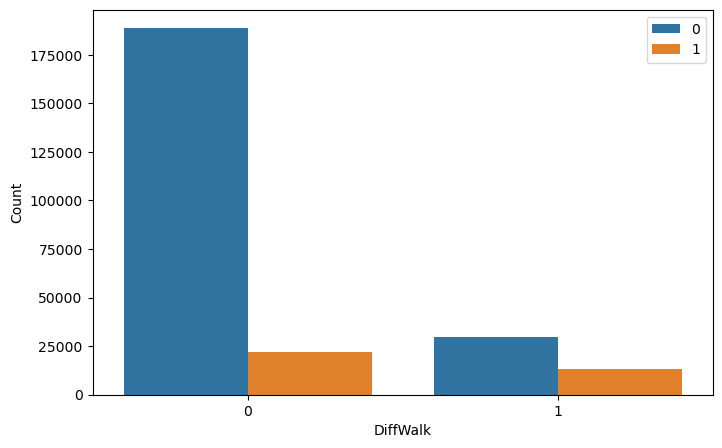

In [174]:
plt.figure(figsize=[8,5])
sns.countplot(data=diabetes_df, x='DiffWalk', hue='DiabetesBinaryStatus')
plt.xlabel('DiffWalk')
plt.ylabel('Count')
plt.legend()
plt.show()


Do individuals who have healthcare coverage (AnyHealthcare) and the inability to see a doctor due to cost (NoDocbcCost) associated with higher diabetes prevalence?

In [161]:
diabetes_df['AnyHealthcare'].value_counts()

AnyHealthcare
1    241263
0     12417
Name: count, dtype: int64

In [160]:
#We will convert our Diabetes Status to Binary because the Prediabetes individuals are not yet declared diabetic, so 0=no_diabetes and 1=prediabetes will be declared as 0=no_diabestes while 1 will be diabetes
diabetes_df['DiabetesBinaryStatus'] = diabetes_df['DiabetesStatus'].apply(lambda x: 1 if x == 2 else 0)
#since we are looking at diabetes risk we will find the prevalence of diabetes with respect to Fruits
prevalence = diabetes_df.groupby(["AnyHealthcare"])["DiabetesBinaryStatus"].mean().reset_index()
prevalence["DiabetesPrevalence(%)"] = prevalence["DiabetesBinaryStatus"] * 100
prevalence

,AnyHealthcare,DiabetesBinaryStatus,DiabetesPrevalence(%)
0,0,0.11452,11.452042
1,1,0.14061,14.061004


In [158]:
#since both diabetesBinaryStatus and AnyHealthcare are both ordinal categorical variable, we will perform a chi-square test
#first get the chi contingency table
contingency_table = pd.crosstab(diabetes_df.DiabetesBinaryStatus, diabetes_df.AnyHealthcare)

# print the table to inspect it
print("Contingency table:")
print(contingency_table)
chi2, pval, _, expected_f = chi2_contingency(contingency_table)
alfa = 0.05
result = ('significant' if pval < alfa else 'not significant')

print(f'chi2: {chi2:.2f}')
print(f'p-value: {pval:.6f}')
print(f'Test result: relationship between AnyHealthcare and Diabetes is {result} (alfa = {alfa})')

Contingency table:
AnyHealthcare             0       1
DiabetesBinaryStatus               
0                     10995  207339
1                      1422   33924
chi2: 66.81
p-value: 0.000000
Test result: relationship between AnyHealthcare and Diabetes is significant (alfa = 0.05)


In [162]:
diabetes_df['NoDocbcCost'].value_counts()

NoDocbcCost
0    232326
1     21354
Name: count, dtype: int64

In [159]:
#We will convert our Diabetes Status to Binary because the Prediabetes individuals are not yet declared diabetic, so 0=no_diabetes and 1=prediabetes will be declared as 0=no_diabestes while 1 will be diabetes
diabetes_df['DiabetesBinaryStatus'] = diabetes_df['DiabetesStatus'].apply(lambda x: 1 if x == 2 else 0)
#since we are looking at diabetes risk we will find the prevalence of diabetes with respect to Fruits
prevalence = diabetes_df.groupby(["NoDocbcCost"])["DiabetesBinaryStatus"].mean().reset_index()
prevalence["DiabetesPrevalence(%)"] = prevalence["DiabetesBinaryStatus"] * 100
prevalence

,NoDocbcCost,DiabetesBinaryStatus,DiabetesPrevalence(%)
0,0,0.136033,13.603299
1,1,0.175236,17.523649


In [157]:
#since both diabetesBinaryStatus and NoDocbcCost are both ordinal categorical variable, we will perform a chi-square test
#first get the chi contingency table
contingency_table = pd.crosstab(diabetes_df.DiabetesBinaryStatus, diabetes_df.NoDocbcCost)

# print the table to inspect it
print("Contingency table:")
print(contingency_table)
chi2, pval, _, expected_f = chi2_contingency(contingency_table)
alfa = 0.05
result = ('significant' if pval < alfa else 'not significant')

print(f'chi2: {chi2:.2f}')
print(f'p-value: {pval:.6f}')
print(f'Test result: relationship between NoDocbcCost and Diabetes is {result} (alfa = {alfa})')

Contingency table:
NoDocbcCost                0      1
DiabetesBinaryStatus               
0                     200722  17612
1                      31604   3742
chi2: 250.31
p-value: 0.000000
Test result: relationship between NoDocbcCost and Diabetes is significant (alfa = 0.05)


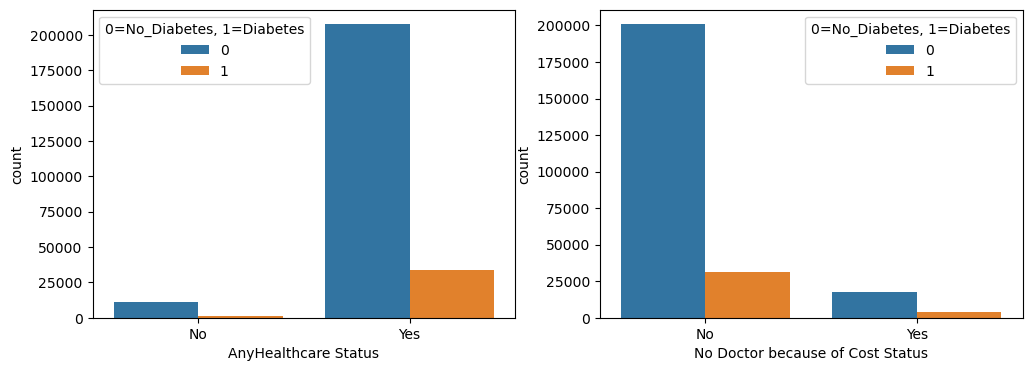

In [156]:
plt.figure(figsize=[12,4])

ax1=plt.subplot(1,2,1)
sns.countplot(data=diabetes_df, x='AnyHealthcare', hue='DiabetesBinaryStatus')
plt.xlabel('AnyHealthcare Status')
plt.ylabel('count')
Any_Health_care = ['No', 'Yes']
x_label = range(len(Any_Health_care))
ax1.set_xticks(x_label)
ax1.set_xticklabels(Any_Health_care)
plt.legend(title="0=No_Diabetes, 1=Diabetes")

ax2=plt.subplot(1,2,2)
sns.countplot(data=diabetes_df, x='NoDocbcCost', hue='DiabetesBinaryStatus')
plt.xlabel('No Doctor because of Cost Status')
plt.ylabel('count')
no_visit_to_doctor_bcCost = ['No', 'Yes']
x_label = range(len(no_visit_to_doctor_bcCost))
ax2.set_xticks(x_label)
ax2.set_xticklabels(no_visit_to_doctor_bcCost)
plt.legend(title="0=No_Diabetes, 1=Diabetes")
plt.show()

### RESULTS AND INTERPRETATION
The dataset consist of 253680 observations(rows) and 22 variables (columns). There were no missing data. Diabetes status was coded as: 0 = No diabetes, 1 = Pre-diabetes, 2 = Has diabetes. Since the pre-diabetes is not a confirmed diabetes status, I decided to group it as non diabetes group, leaving diabetes to have binary values of 0 (no diabetes) and 1 (diabetes).

Statistical methods used include t-tests and chi-square tests to assess associations and differences across groups.

This project was able to analyse and answer the questions stated in the goals. Below are the results of each questions.

##### DEMOGRAPHICS

- What is the prevalence of diabetes (Diabetes_012) in the dataset?

ANSWER: From our diabetes prevalence table, 13.9%(35346) of the entire population of our dataset has has diabetes. 84.2% (213703) does not have diabetes while 1.8% (4631) are in the prediabetes stage.

- How does diabetes status vary across demographic factors such as age, sex, education, and income?

ANSWER: From our bar charts, we can conclude that:
-For income and Education, diabetes status increases as income and education status increases.
-For sex, diabetes are more common in females than in males, as females have the highest proportion of the population.
-For age, diabetes values increases with age as the younger groups (18–24 and 25–29) had substantially lower prevalence.


- Which age groups show the highest proportion of diabetes?

ANSWER: Diabetes prevalence increased with age. The highest proportion of diabetes was observed among individuals aged 70–74 years, followed by those aged 75–79 years. Younger groups (18–24 and 25–29) had substantially lower prevalence. From 75 - 79 and 80 - more had a slight decline maybe due to survivorship. Age is a strong  non-modifiable risk factor. 

##### LIFESTYLE

- Does BMI (Body Mass Index) differ significantly between diabetic and non-diabetic individuals?

ANSWER: From the histogram and the values of the t-test performed with a tsat value of -99.9196, P-value: 0.000000, we can see that there is a significant difference between the BMI of diabetic and non-diabetic individuals.
People with diabetes had higher BMI, suggesting overweight/obesity is linked to higher diabetes risk. Higher BMI is a strong modifiable risk factor for diabetes.

- Is physical activity (PhysActivity) associated with lower diabetes prevalence?

ANSWER: Physical activity (1): lower prevalence, No physical activity (0): higher prevalence.From the chi-square test with values (chi2: 3539.42 p-value: 0.000000), association between Physical activity and Diabetes Prevalence is significant, also from the dataset and the bar chart, we can see that People who do physical activity tend to have lower diabetes prevalence and People who do not do physical activity have higher diabetes prevalence. Physical inactivity increases diabetes risk.

- Does smoking (Smoker) status influence diabetes risk?

ANSWER: Diabetes prevalence was higher among smokers (16.29%) than non-smokers (12.06%), Prevalence shows: The difference is 4.24 percentage points (16.29 − 12.06 = 4.23). A chi-square test confirmed that this difference was statistically significant (χ² = 937.06, p < 0.001). This indicates that the prevalence of diabetes differs substantially between smokers and non-smokers. Therefore, smoking status has a strong influence on diabetes risk in this dataset.
Smokers have higher diabetes prevalence.The extremely small p-value indicates this relationship is not due to chance. Smoking is significantly associated with higher diabetes risk.

- Do heavy alcohol consumers (HvyAlcoholConsump) have different diabetes rates compared to non-heavy drinkers?

ANSWER:Diabetes prevalence was lower among heavy alcohol consumers (5.84%) compared to non-heavy alcohol consumers (14.42%), this is due to the proportion of heavy alcohol consumption population in our dataset.
A chi-square test showed this difference to be statistically significant (χ² = 825.12, p < 0.001),indicating a strong association
and statistical difference between heavy alcohol consumption and diabetes rates.
Although heavy drinkers show lower diabetes prevalence, this result should be interpreted carefully, because:

- Heavy drinkers may be younger.
- They may have lower BMI.
- They may differ in income, activity, or other confounders.
- Some may under-report diabetes
- People with diabetes often stop drinking
- Some heavy drinkers may develop other health complications before diabetes appears.
- Some datasets classify alcohol differently.
So the pattern is statistical association, not necessarily causal protection.
There is a significant association, but lower diabetes rates among heavy drinkers should not be interpreted as protective.
Just because heavy drinkers have lower diabetes prevalence in your dataset does not prove alcohol reduces diabetes risk.

- Does fruit or vegetable consumption (Fruits, Veggies) relate to diabetes status?
ANSWER:
Fruits
Chi2 = 421.61, p < 0.000001
Very strong evidence that fruit consumption is associated with diabetes status.
Vegetables
Chi2 = 811.81, p < 0.000001
Even stronger evidence that vegetable consumption is associated with diabetes status. Statistically, both relationships are highly significant.

Fruits Population:
Eating fruits = 160,898
Not eating fruits = 92,782

Vegetables Population:
Eating vegetables = 205,841
Not eating vegetables = 47,839

Large sample sizes mean: Chi-square tests have very high statistical power
This supports that the relationships are not only statistically significant but also practically relevant.

Fruits and diabetes
People who do not eat fruits show ~23% higher diabetes prevalence
(15.79 vs 12.86)
Vegetables and diabetes
People who do not eat vegetables show ~38% higher diabetes prevalence
(17.99 vs 12.99)

The vegetable-consumption relationship is stronger, based on:
-Higher prevalence gap
-Higher chi-square statistic
-Smaller veggie-eating group (47k) compared to fruit-eating group (92k), yet stronger effect

Fruit and vegetable consumption both show significant associations with diabetes status. Individuals who do not eat fruits have 
higher diabetes prevalence (15.79%) compared to those who do (12.86%). The effect is even stronger for vegetables: non-consumers
have a diabetes prevalence of 17.99% compared to 12.99% among consumers. Chi-square tests confirm these associations are 
statistically significant (p < 0.000001). Given the large sample sizes, these findings provide strong evidence that lower fruit 
and vegetable intake is linked to higher diabetes prevalence in this population.

##### CHRONIC DISEASE

- Is there an association between high blood pressure (HighBP) and diabetes?

ANSWER: There is a strong relationship between HighBP and diabetes. A chi-square test showed this relationship to be statistically significant (χ² = 17564.45, p < 0.001),indicating a strong association and statistical difference between HighBP and diabetes status.

How does high cholesterol (HighChol) relate to diabetes status?

ANSWER: There is a strong relationship between HighBP and diabetes. From our Chart and our Chi square test, the relationship is statistically significant indicating a strong association and statistical difference between High Cholesterol and diabetes status.

Is there evidence that individuals with stroke or heart disease/heart attack have higher rates of diabetes?

ANSWER: The relationship between Stroke/HeartDiseaseorAttack and Diabetes is significant after performing a chi-square test giving a very low p-values and high chi2 values.

##### PHYSICAL HEALTH AND HEALTH CARE ACCESS

Are mental health days (MentHlth), physical health days (PhysHlth) and difficulty walking (DiffWalk) more common among people with diabetes?

ANSWER: After performing a t-test method for both MentHlth and PhysHlth we got a very low value of p-value showing a strong relationship between both variables and diabetes status.

Do individuals who have healthcare coverage (AnyHealthcare) and the inability to see a doctor due to cost (NoDocbcCost) associated with higher diabetes prevalence?

ANSWER: Individuals who have access to healthcare coverage and who have access to see the doctor irrespective of cost tends to have a higher proportion of diabetes prevalence. Our Chi square test and our chart can show the relationship between both variables and diabetes status.

### CONCLUSION

The analysis provides strong evidence that several lifestyle and demographic factors are associated with diabetes risk in the population. 
Across all variables, several consistent patterns emerge:

Non-modifiable risk factor:

- Age: Older individuals show significantly higher diabetes prevalence.

Modifiable risk factors:

- High BMI: Strongly linked to diabetes.

- Physical inactivity: Higher diabetes prevalence in inactive individuals.

- Smoking: Strong statistical association with higher diabetes.

- Poor diet: Low fruit and vegetable intake associated with higher diabetes.

- Chronic condition: Stroke, HighBP, High Cholesterol, HeartAttack/Disease associated with higher diabetes.

- Physical Health Conditions: Difficult in walking, Physical health, mental health are associated with higher diabetes.

- Health Care Access and Visiting the doctor irrespective of cost(NoDocBcCst) are associated with higher diabetes.

Diabetes risk increases sharply with age, especially in individuals aged 45+.
BMI is significantly higher among diabetic individuals, identifying obesity as a major risk factor.
Physical inactivity shows a strong association with increased diabetes prevalence.
Smokers have significantly higher diabetes prevalence than non-smokers.
Fruit and vegetable consumption are protective, showing lower diabetes prevalence among consumers.

Statistical tests (chi-square and t-test) consistently show that these relationships are significant and unlikely due to chance.

Overall, both lifestyle and demographic characteristics play important roles in diabetes status.

### RECOMMENDATION
1. Increase Physical Activity:
Public health campaigns promoting daily exercise. Workplace and school physical activity programs.

2. Strengthen Smoking Cessation Programs:
Integrate diabetes education into smoking-related health messaging. Provide support to help individuals quit smoking.

3. Improve Dietary Habits:
Emphasize eating fruits and vegetables daily.Increase access to affordable produce in communities.

4. Focus Screening on High-Risk Age Groups:
Encourage regular diabetes testing for adults aged 45+.

6. Carefully Interpret Alcohol Results:
Do not recommend heavy drinking.Investigate confounding factors in further analyses.

7. Multi-factor Prevention Approach:
Diabetes prevention programs should combine: Healthy diet, Physical activity, Weight reduction, Smoking cessation, Age-targeted screening.

### CHALLENGES AND LIMITATIONS OF THIS ANALYSIS

This analysis faces several challenges, including confounding variables, self-reported behaviour bias, and the inability to establish causal relationships due to the cross-sectional nature of the data. Large sample sizes inflate chi-square significance, and binary coding oversimplifies complex behaviours such as diet and physical activity. Diabetes may also be underreported or undiagnosed. These limitations should be considered when interpreting associations between lifestyle factors and diabetes risk.